# Data preprocessing 

In [1]:
from __future__ import print_function
from sklearn.preprocessing import Normalizer
import random
import torch
import torch.nn as nn
import torch.optim as optim
import math
import numpy as np
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader,random_split,TensorDataset
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay
from sklearn import preprocessing

from obspy.clients.fdsn import Client
from obspy.core import UTCDateTime
from obspy import read


/Users/liuxiaoyu/opt/anaconda3/envs/python3_7/lib/python3.7/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/liuxiaoyu/opt/anaconda3/envs/python3_7/lib/python3.7/site-packages/torchvision/image.so, 6): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: /Users/liuxiaoyu/opt/anaconda3/envs/python3_7/lib/python3.7/site-packages/torchvision/image.so
  Reason: Incompatible library version: image.so requires version 15.0.0 or later, but libjpeg.9.dylib provides version 14.0.0
  warn(f"Failed to load image Python extension: {e}")


# scanario 3: 51 events, 2794 traces

In [2]:
before_st = read( "before_event_001.mseed")
before_st += read("before_event_003.mseed")
before_st += read("before_event_005.mseed")
before_st += read("before_event_007.mseed")
before_st += read("before_event_009.mseed")
before_st += read("before_event_011.mseed")
before_st += read("before_event_013.mseed")
before_st += read("before_event_015.mseed")
before_st += read("before_event_017.mseed")
before_st += read("before_event_019.mseed")
before_st += read("before_event_021.mseed")
before_st += read("before_event_023.mseed")
before_st += read("before_event_025.mseed")
before_st += read("before_event_027.mseed")
before_st += read("before_event_029.mseed")
before_st += read("before_event_031.mseed")
before_st += read("before_event_033.mseed")
before_st += read("before_event_035.mseed")
before_st += read("before_event_037.mseed")
before_st += read("before_event_039.mseed")
before_st += read("before_event_041.mseed")
before_st += read("before_event_043.mseed")
before_st += read("before_event_045.mseed")
before_st += read("before_event_047.mseed")
before_st += read("before_event_049.mseed")
before_st += read("before_event_051.mseed")
before_st += read("before_event_053.mseed")
before_st += read("before_event_055.mseed")
before_st += read("before_event_057.mseed")
before_st += read("before_event_059.mseed")
before_st += read("before_event_061.mseed")
before_st += read("before_event_063.mseed")
before_st += read("before_event_065.mseed")
before_st += read("before_event_067.mseed")
before_st += read("before_event_069.mseed")
before_st += read("before_event_071.mseed")
before_st += read("before_event_073.mseed")
before_st += read("before_event_075.mseed")
before_st += read("before_event_077.mseed")
before_st += read("before_event_079.mseed")
before_st += read("before_event_081.mseed")
before_st += read("before_event_083.mseed")
before_st += read("before_event_085.mseed")
before_st += read("before_event_087.mseed")
before_st += read("before_event_089.mseed")
before_st += read("before_event_091.mseed")
before_st += read("before_event_093.mseed")
before_st += read("before_event_095.mseed")
before_st += read("before_event_097.mseed")
before_st += read("before_event_099.mseed")
before_st += read("before_event_101.mseed")
before_st += read("before_event_103.mseed")
before_st += read("before_event_105.mseed")
before_st += read("before_event_107.mseed")
before_st += read("before_event_109.mseed")
before_st += read("before_event_111.mseed")
before_st += read("before_event_113.mseed")
before_st += read("before_event_115.mseed")
before_st += read("before_event_117.mseed")
before_st += read("before_event_119.mseed")
before_st += read("before_event_121.mseed")
before_st += read("before_event_123.mseed")
before_st += read("before_event_125.mseed")
before_st += read("before_event_127.mseed")
before_st += read("before_event_129.mseed")
before_st += read("before_event_131.mseed")
before_st += read("before_event_133.mseed")
before_st += read("before_event_135.mseed")
before_st += read("before_event_137.mseed")
before_st += read("before_event_139.mseed")
before_st += read("before_event_141.mseed")
before_st += read("before_event_143.mseed")
before_st += read("before_event_145.mseed")
before_st += read("before_event_147.mseed")
before_st += read("before_event_149.mseed")
before_st += read("before_event_151.mseed")
print(before_st)
for trace in before_st:
    print(len(trace))
num_of_traces_before = (len(before_st))
print(num_of_traces_before)

4364 Trace(s) in Stream:

IU.ADK.00.LHZ | 2003-11-25T19:20:00.873218Z - 2003-11-25T20:19:50.873218Z | 0.1 Hz, 360 samples
...
(4362 other traces)
...
IU.YSS.00.LHZ | 2002-01-02T16:23:01.761046Z - 2002-01-02T17:22:51.761046Z | 0.1 Hz, 360 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360


360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360


In [3]:
after_st = read("after_event_001.mseed")
after_st += read("after_event_003.mseed")
after_st += read("after_event_005.mseed")
after_st += read("after_event_007.mseed")
after_st += read("after_event_009.mseed")
after_st += read("after_event_011.mseed")
after_st += read("after_event_013.mseed")
after_st += read("after_event_015.mseed")
after_st += read("after_event_017.mseed")
after_st += read("after_event_019.mseed")
after_st += read("after_event_021.mseed")
after_st += read("after_event_023.mseed")
after_st += read("after_event_025.mseed")
after_st += read("after_event_027.mseed")
after_st += read("after_event_029.mseed")
after_st += read("after_event_031.mseed")
after_st += read("after_event_033.mseed")
after_st += read("after_event_035.mseed")
after_st += read("after_event_037.mseed")
after_st += read("after_event_039.mseed")
after_st += read("after_event_041.mseed")
after_st += read("after_event_043.mseed")
after_st += read("after_event_045.mseed")
after_st += read("after_event_047.mseed")
after_st += read("after_event_049.mseed")
after_st += read("after_event_051.mseed")
after_st += read("after_event_053.mseed")
after_st += read("after_event_055.mseed")
after_st += read("after_event_057.mseed")
after_st += read("after_event_059.mseed")
after_st += read("after_event_061.mseed")
after_st += read("after_event_063.mseed")
after_st += read("after_event_065.mseed")
after_st += read("after_event_067.mseed")
after_st += read("after_event_069.mseed")
after_st += read("after_event_071.mseed")
after_st += read("after_event_073.mseed")
after_st += read("after_event_075.mseed")
after_st += read("after_event_077.mseed")
after_st += read("after_event_079.mseed")
after_st += read("after_event_081.mseed")
after_st += read("after_event_083.mseed")
after_st += read("after_event_085.mseed")
after_st += read("after_event_087.mseed")
after_st += read("after_event_089.mseed")
after_st += read("after_event_091.mseed")
after_st += read("after_event_093.mseed")
after_st += read("after_event_095.mseed")
after_st += read("after_event_097.mseed")
after_st += read("after_event_099.mseed")
after_st += read("after_event_101.mseed")
after_st += read("after_event_103.mseed")
after_st += read("after_event_105.mseed")
after_st += read("after_event_107.mseed")
after_st += read("after_event_109.mseed")
after_st += read("after_event_111.mseed")
after_st += read("after_event_113.mseed")
after_st += read("after_event_115.mseed")
after_st += read("after_event_117.mseed")
after_st += read("after_event_119.mseed")
after_st += read("after_event_121.mseed")
after_st += read("after_event_123.mseed")
after_st += read("after_event_125.mseed")
after_st += read("after_event_127.mseed")
after_st += read("after_event_129.mseed")
after_st += read("after_event_131.mseed")
after_st += read("after_event_135.mseed")
after_st += read("after_event_137.mseed")
after_st += read("after_event_139.mseed")
after_st += read("after_event_141.mseed")
after_st += read("after_event_143.mseed")
after_st += read("after_event_145.mseed")
after_st += read("after_event_147.mseed")
after_st += read("after_event_149.mseed")
after_st += read("after_event_151.mseed")
print(after_st)

num_of_traces_after = (len(after_st))
print(num_of_traces_after)

for trace in after_st:
    print(len(trace))

4313 Trace(s) in Stream:

IU.ADK.00.LHZ | 2003-11-25T20:19:50.873218Z - 2003-11-25T21:19:40.873218Z | 0.1 Hz, 360 samples
...
(4311 other traces)
...
IU.YSS.00.LHZ | 2002-01-02T17:22:51.761046Z - 2002-01-02T18:22:41.761046Z | 0.1 Hz, 360 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]
4313
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360

360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360


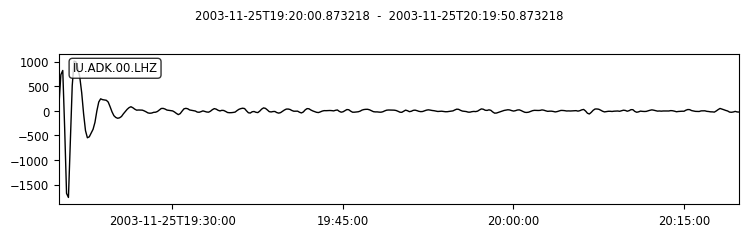

In [6]:
before_st[0].plot();

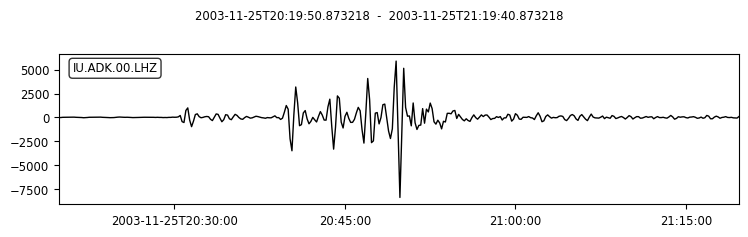

In [7]:
after_st[0].plot();

# Data standardisation 

In [5]:
# combining the data into dataset
X_data = np.vstack([before_st,after_st])
X_data = preprocessing.scale(X_data)

# 0 = ‘before event’, 1=‘after event’
Y_data = np.hstack([np.zeros(num_of_traces_before),
                    np.ones(num_of_traces_after)])   

In [6]:
print(type(X_data))
print(type(Y_data))
print(X_data.shape)
print(Y_data.shape)

# Parameters for waveforms
samples = len(trace)
print(samples)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(8677, 360)
(8677,)
360


# Dataset splitting

In [7]:
# Splitting the dataset into training set and rest of data
train_x, rest_x, train_y, rest_y = train_test_split(X_data, Y_data, train_size=0.8, random_state=0)

# spliting the rest of data into validation set and testing set
valid_x, test_x, valid_y, test_y = train_test_split(rest_x, rest_y, test_size=0.5, random_state=0)

# 80%
train_x = torch.from_numpy(train_x).type(torch.float32).unsqueeze(-1)
train_y = torch.from_numpy(train_y).type(torch.int64)

# 10%
valid_x = torch.from_numpy(valid_x).type(torch.float32).unsqueeze(-1)
valid_y = torch.from_numpy(valid_y).type(torch.int64)

# 10%
test_x = torch.from_numpy(test_x).type(torch.float32).unsqueeze(-1)
test_y = torch.from_numpy(test_y).type(torch.int64)


In [8]:
print("train_x.shape = ", train_x.shape, " train_y.shape = ", train_y.shape)
print("valid_x.shape = ", valid_x.shape, " valid_y.shape = ", valid_y.shape)
print("test_x.shape = ", test_x.shape, " test_y.shape = ", test_y.shape)

train_x.shape =  torch.Size([6941, 360, 1])  train_y.shape =  torch.Size([6941])
valid_x.shape =  torch.Size([868, 360, 1])  valid_y.shape =  torch.Size([868])
test_x.shape =  torch.Size([868, 360, 1])  test_y.shape =  torch.Size([868])


In [9]:
batch = 512

train_ds = TensorDataset(train_x, train_y)
train_dl = DataLoader(train_ds, batch_size=batch, shuffle=True)

valid_ds = TensorDataset(valid_x, valid_y)
valid_dl = DataLoader(valid_ds, batch_size=batch, shuffle=True)

test_ds = TensorDataset(test_x, test_y)
test_dl = DataLoader(test_ds, batch_size=batch, shuffle=False)

In [10]:
train_data_size = len(train_ds)
valid_data_size = len(valid_ds)
test_data_size = len(test_ds)
print(train_data_size)
print(valid_data_size)
print(test_data_size)

6941
868
868


# The 1D CNN model

In [11]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels=360, out_channels=100, kernel_size=1)
        self.conv2 = nn.Conv1d(in_channels=100, out_channels=50, kernel_size=1)

        self.fc1 = nn.Linear(in_features=50, out_features=40)
        self.fc2 = nn.Linear(in_features=40, out_features=30)
        self.out = nn.Linear(in_features=30, out_features=2)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
       
        x = x.flatten(1) # flatten the tensor starting at dimension 1

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

if torch.cuda.is_available():
    cnn_cuda=cnn_cuda.cuda()
    
if __name__=='__main__':
    cnn = Network()
    input = torch.ones(10000, 360, 1)
    output = cnn(input)
#     print(output.shape)

In [12]:
# print(cnn.state_dict())

# Training and testing

In [13]:
# parameters for training model

# totaol No. of traing
total_train_step = 0

# totaol No. of testing
total_test_step = 0

# Loss function 
loss_fn = nn.CrossEntropyLoss()

if torch.cuda.is_available():
    loss_fn = loss_fn.cuda()
    
# Optimizer
learning_rate = 0.001
# optimizer = torch.optim.SGD(cnn.parameters(), lr = learning_rate, momentum=0.9)
optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate, weight_decay=1e-5)

# epoch
epoch = 20

# # tensorboard
# writer = SummaryWriter("logs")
# start_time = time.time()

In [14]:
train_losses = []
train_acces = []
test_losses = []
test_acces = []


# save_path = ".\\" 
# early_stopping = EarlyStopping(save_path)

for i in range(epoch):
#     print("-------The {} epoch of training-------".format(i+1))
    
    # training
    train_loss = 0.0
    train_acc = 0.0
    cnn.train()  # training mode
    
    for data in train_dl:
        train_x, train_y = data
        
#         if torch.cuda.is_available():
#             train_x = train_x.cuda()
#             train_y = train_y.cuda()
        
        outputs = cnn(train_x)          # use train_x as inputs to the model
        loss = loss_fn(outputs,train_y) # calculate the loss between outputs and train_y
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() 
        
        # record train loss
        train_loss += loss.item()
        
        # train accuracy        
        train_accuracy = (outputs.argmax(1) == train_y).sum()
        train_acc += train_accuracy
        
    train_losses.append(train_loss/train_data_size)
    train_acces.append(train_acc/train_data_size)
        
#         total_train_accuracy = (outputs.argmax(1) == train_y).sum()
#         total_train_accuracy += total_train_accuracy           
#         total_train_step = total_train_step + 1        
#         if total_train_step % 100 == 0:
#             print ("The number of training:{}, Loss:{}".format(total_train_step, loss.item()))   
            
    # testing    
    test_loss = 0.0
    test_acc = 0.0
    cnn.eval()
    
    with torch.no_grad():
        for data in test_dl:
            test_x,test_y = data

    #             if torch.cuda.is_available():
    #                 test_x = test_x.cuda()
    #                 test_y = test_y.cuda()

            outputs = cnn(test_x)
            loss = loss_fn(outputs, test_y)

            # record train loss
            test_loss += loss.item()       

            # test accuracy         
            test_accuracy = (outputs.argmax(1) == test_y).sum()
            test_acc += test_accuracy

        test_losses.append(test_loss/test_data_size)
        test_acces.append(test_acc/test_data_size)

    print("epoch:{},Train Loss: {:.4f},Train Acc: {:.2f},Test Loss: {:.4f},Test Acc: {:.2f}".format(i+1, 
          train_loss/train_data_size, 
          train_acc/train_data_size,
          test_loss/test_data_size, 
          test_acc/test_data_size))

#     # early stopping
#     early_stopping(test_loss, cnn)
    
#     if early_stopping.early_stop:
#         print("Early stopping")
#         break 

#     torch.save(cnn, 'best_cnn.pth')  # save the network
#     torch.save(cnn.state_dict(), 'cnn_params.pth')   # only save parameters 


epoch:1,Train Loss: 0.0014,Train Acc: 0.50,Test Loss: 0.0016,Test Acc: 0.54
epoch:2,Train Loss: 0.0014,Train Acc: 0.52,Test Loss: 0.0016,Test Acc: 0.62
epoch:3,Train Loss: 0.0014,Train Acc: 0.60,Test Loss: 0.0016,Test Acc: 0.68
epoch:4,Train Loss: 0.0014,Train Acc: 0.70,Test Loss: 0.0015,Test Acc: 0.76
epoch:5,Train Loss: 0.0013,Train Acc: 0.73,Test Loss: 0.0015,Test Acc: 0.76
epoch:6,Train Loss: 0.0012,Train Acc: 0.74,Test Loss: 0.0014,Test Acc: 0.77
epoch:7,Train Loss: 0.0011,Train Acc: 0.77,Test Loss: 0.0013,Test Acc: 0.78
epoch:8,Train Loss: 0.0010,Train Acc: 0.79,Test Loss: 0.0012,Test Acc: 0.80
epoch:9,Train Loss: 0.0009,Train Acc: 0.82,Test Loss: 0.0012,Test Acc: 0.82
epoch:10,Train Loss: 0.0009,Train Acc: 0.84,Test Loss: 0.0012,Test Acc: 0.84
epoch:11,Train Loss: 0.0008,Train Acc: 0.85,Test Loss: 0.0010,Test Acc: 0.84
epoch:12,Train Loss: 0.0007,Train Acc: 0.85,Test Loss: 0.0011,Test Acc: 0.87
epoch:13,Train Loss: 0.0007,Train Acc: 0.87,Test Loss: 0.0010,Test Acc: 0.87
epoch:14

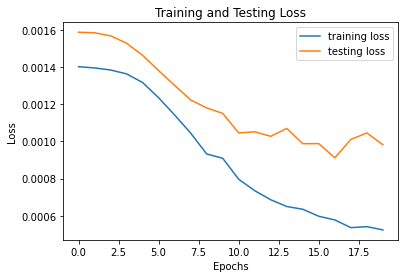

In [15]:
# ploting training and testing loss
plt.plot(train_losses,label='training loss')
plt.plot(test_losses,label='testing loss')
plt.title("Training and Testing Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc = "upper right")
plt.show()

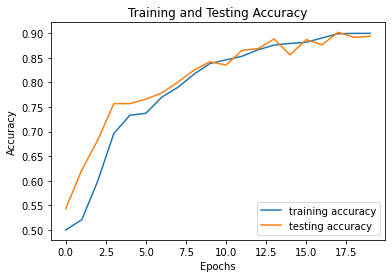

In [16]:
# ploting training and testing acc
plt.plot(train_acces,label='training accuracy')
plt.plot(test_acces,label='testing accuracy')
plt.title("Training and Testing Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")
plt.show()

torch.Size([868])
torch.Size([464, 360, 1])
torch.Size([404, 360, 1])


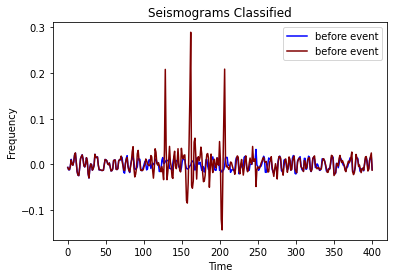

In [17]:
# plotting the classification results 
tt = np.linspace(0, 400, num = samples) 
cnn_outputs = cnn(valid_x).argmax(1)
print(cnn_outputs.shape)
x1 = valid_x[cnn_outputs == 0]      # low frequency 
x2 = valid_x[cnn_outputs == 1]      # high frequency 

print(x1.shape)
print(x2.shape)

ax = plt.subplots()
# before event
# plt.plot(tt, x1[0,:], color = 'blue',label='before event')   
plt.plot(tt, x1[50,:],color = 'blue',label='before event')              
# plt.plot(tt, x1[99,:],color = 'blue',label='before event')

# after event 
# plt.plot(tt, x2[0,:], color = 'maroon',label='after event')   
plt.plot(tt, x2[50,:], color = 'maroon',label='before event')             
# plt.plot(tt, x2[99,:], color = 'red',label='before event') 

plt.legend(loc= "upper right")
plt.title("Seismograms Classified")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

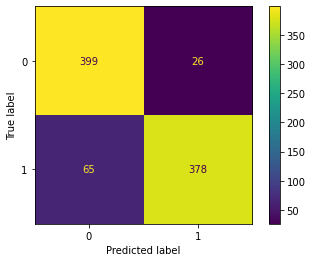

In [18]:
# Plotting confusion matrix

x=valid_x
y=valid_y

test_outputs = cnn(x)
# print(test_outputs.shape)
pred_y = test_outputs.argmax(1)

# print('predict number :',y)
# print('true number:',y)

# confusion matrix
cm = confusion_matrix(y, pred_y, labels=None, sample_weight=None)
confusion_matrix(y, pred_y)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()